In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import matplotx
from labellines import labelLines

import sympy as sp

## Deriving an expression for $\mathrm{TBE}$

In [2]:
n_dot_t_burn = sp.Symbol("\dot{N}_\mathrm{T, burn}")
n_dot_alpha = sp.Symbol(r"\dot{N}_\alpha")
n_dot_he_div = sp.Symbol(r"\dot{N}_\mathrm{He, div}")

n_dot_t_in = sp.Symbol(r"\dot{N}_\mathrm{T, in}")
n_dot_t_div = sp.Symbol(r"\dot{N}_\mathrm{T, div}")
n_dot_d_in = sp.Symbol(r"\dot{N}_\mathrm{D, in}")
n_dot_d_div = sp.Symbol(r"\dot{N}_\mathrm{D, div}")
n_dot_q_in = sp.Symbol(r"\dot{N}_\mathrm{Q, in}")
n_dot_q_div = sp.Symbol(r"\dot{N}_\mathrm{Q, div}")
n_dot_he_in = sp.Symbol(r"\dot{N}_\mathrm{He, in}")
tbe = sp.Symbol(r"\mathrm{TBE}")

In [3]:
# Eq 2

n_T_burn_eqs_n_alpha = sp.Eq(n_dot_t_burn, n_dot_alpha)
n_T_burn_eqs_n_alpha

Eq(\dot{N}_\mathrm{T, burn}, \dot{N}_\alpha)

In [4]:
n_T_burn_eqs_n_he_div = sp.Eq(n_dot_t_burn, n_dot_he_div)
n_T_burn_eqs_n_he_div

Eq(\dot{N}_\mathrm{T, burn}, \dot{N}_\mathrm{He, div})

In [5]:
# Eq 3

n_t_in_eqs_n_d_in = sp.Eq(n_dot_t_in, n_dot_d_in)
n_t_in_eqs_n_d_in

Eq(\dot{N}_\mathrm{T, in}, \dot{N}_\mathrm{D, in})

In [6]:
n_t_in_eqs_half_n_q_in = sp.Eq(n_dot_t_in, sp.Rational("0.5") * n_dot_q_in)
n_t_in_eqs_half_n_q_in

Eq(\dot{N}_\mathrm{T, in}, \dot{N}_\mathrm{Q, in}/2)

In [7]:
# Eq 4
n_t_div_eqs_n_d_div = sp.Eq(n_dot_t_div, n_dot_d_div)
n_t_div_eqs_n_d_div

Eq(\dot{N}_\mathrm{T, div}, \dot{N}_\mathrm{D, div})

In [8]:
n_t_div_eqs_half_n_q_div = sp.Eq(n_dot_t_div, sp.Rational("0.5") * n_dot_q_div)
n_t_div_eqs_half_n_q_div

Eq(\dot{N}_\mathrm{T, div}, \dot{N}_\mathrm{Q, div}/2)

In [9]:
# Eq 5
inventory_equilibrium = sp.Eq(n_dot_q_in, n_dot_q_div + sp.Rational("2") * n_dot_he_div)
inventory_equilibrium

Eq(\dot{N}_\mathrm{Q, in}, 2*\dot{N}_\mathrm{He, div} + \dot{N}_\mathrm{Q, div})

In [10]:
# Eq6

tbe_definition = sp.Eq(tbe, n_dot_t_burn / n_dot_t_in)
tbe_definition


Eq(\mathrm{TBE}, \dot{N}_\mathrm{T, burn}/\dot{N}_\mathrm{T, in})

In [11]:
# Equation 6
eq6 = (
    tbe_definition.subs(n_dot_t_burn, sp.solve(n_T_burn_eqs_n_alpha, n_dot_t_burn)[0])
    .subs(n_dot_t_in, sp.solve(n_t_in_eqs_half_n_q_in, n_dot_t_in)[0])
    .subs(n_dot_q_in, sp.solve(inventory_equilibrium, n_dot_q_in)[0])
    .subs(n_dot_q_div, sp.solve(n_t_div_eqs_half_n_q_div, n_dot_q_div)[0])
).simplify()

eq6


Eq(\mathrm{TBE}, \dot{N}_\alpha/(\dot{N}_\mathrm{He, div} + \dot{N}_\mathrm{T, div}))

In [12]:
# Eq 7
eq7a = eq6.subs(n_dot_alpha, sp.solve(n_T_burn_eqs_n_alpha, n_dot_alpha)[0]).subs(
    n_dot_t_burn, sp.solve(n_T_burn_eqs_n_he_div, n_dot_t_burn)[0]
)

# TODO make this programmatically
# see https://stackoverflow.com/questions/74732938/how-to-factorize-fraction-by-a-given-symbol
eq7b = eq7a.subs(n_dot_he_div, 1).subs(n_dot_t_div, n_dot_t_div / n_dot_he_div)

eq7 = sp.Eq(eq7a.lhs, sp.Eq(eq7a.rhs, eq7b.rhs))
eq7


Eq(\mathrm{TBE}, Eq(\dot{N}_\mathrm{He, div}/(\dot{N}_\mathrm{He, div} + \dot{N}_\mathrm{T, div}), 1/(1 + \dot{N}_\mathrm{T, div}/\dot{N}_\mathrm{He, div})))

In [13]:
# Eq 8

eq8 = eq7b.subs(n_dot_t_div, sp.solve(n_t_div_eqs_half_n_q_div, n_dot_t_div)[0])
eq8


Eq(\mathrm{TBE}, 1/(1 + \dot{N}_\mathrm{Q, div}/(2*\dot{N}_\mathrm{He, div})))

In [14]:
n_d_div = sp.Symbol("n_\mathrm{D, div}")
n_t_div = sp.Symbol("n_\mathrm{T, div}")
n_he_div = sp.Symbol("n_\mathrm{He, div}")
n_q_div = sp.Symbol("n_\mathrm{Q, div}")

S_d = sp.Symbol("S_\mathrm{D}")
S_t = sp.Symbol("S_\mathrm{T}")
S_he = sp.Symbol("S_\mathrm{He}")
S_q = sp.Symbol("S_\mathrm{Q}")

sigma = sp.Symbol("\Sigma")
f_he_div = sp.Symbol("f_\mathrm{He, div}")


In [15]:
eq9_q_div = sp.Eq(n_dot_q_div, n_q_div * S_q)
eq9_q_div


Eq(\dot{N}_\mathrm{Q, div}, S_\mathrm{Q}*n_\mathrm{Q, div})

In [16]:
eq9_he_div = sp.Eq(n_dot_he_div, n_he_div * S_he)
eq9_he_div

Eq(\dot{N}_\mathrm{He, div}, S_\mathrm{He}*n_\mathrm{He, div})

In [17]:
eq10 = sp.Eq(sigma, S_he / S_q)
eq10


Eq(\Sigma, S_\mathrm{He}/S_\mathrm{Q})

In [18]:
eq11 = sp.Eq(f_he_div, n_he_div / n_q_div)
eq11


Eq(f_\mathrm{He, div}, n_\mathrm{He, div}/n_\mathrm{Q, div})

In [19]:
eq12 = eq8.subs(n_dot_q_div, sp.solve(eq9_q_div, n_dot_q_div)[0]).subs(
    n_dot_he_div, sp.solve(eq9_he_div, n_dot_he_div)[0]
)
eq12 = eq12.subs(S_q, sp.solve(eq10, S_q)[0])
eq12 = eq12.subs(n_q_div, sp.solve(eq11, n_q_div)[0])
eq12


Eq(\mathrm{TBE}, 1/(1 + 1/(2*\Sigma*f_\mathrm{He, div})))

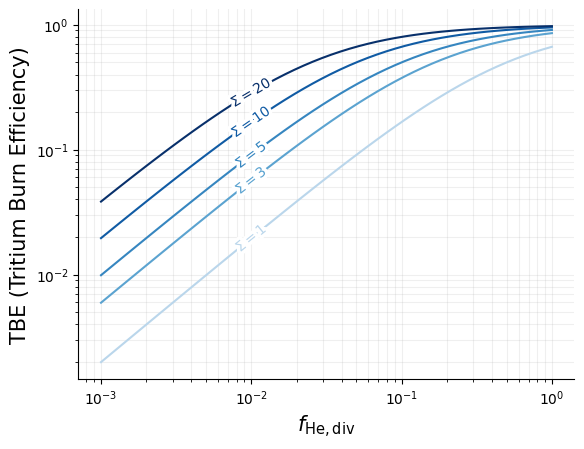

In [20]:
compute_tbe = sp.lambdify(((sigma, f_he_div),), sp.solve(eq12, tbe)[0])
f_he_div_values = np.geomspace(1e-3, 1)
sigma_values = [1, 3, 5, 10, 20]
norm = colors.LogNorm(vmin=3e-1, vmax=20)

for sigma_val in sigma_values:
    plt.loglog(
        f_he_div_values,
        compute_tbe((sigma_val, f_he_div_values)),
        color=cm.Blues(norm(sigma_val)),
        label="$\Sigma = $" + f"{sigma_val}"
    )

labelLines(plt.gca().get_lines(), zorder=2.5, xvals=[1e-2]*len(sigma_values))
plt.gca().spines.right.set_visible(False)
plt.gca().spines.top.set_visible(False)

plt.xlabel("$f_\mathrm{He, div}$", fontsize=15)
plt.ylabel("TBE (Tritium Burn Efficiency)", fontsize=15)
plt.grid(alpha=0.2, which='both')
plt.savefig("TBE_fHediv_UPDATE.pdf")

## Divertor function, helium fraction, TBE, and fusion power density

In [21]:
P_f = sp.Symbol("P_\mathrm{f}")
P_f_max = sp.Symbol("P_\mathrm{f, max}")
f_dil = sp.Symbol("f_\mathrm{dil}")
f_alpha_core = sp.Symbol(r"f_\mathrm{\alpha, core}")
eta_he = sp.Symbol("\eta_\mathrm{He}")
n_alpha = sp.Symbol(r"n_{\alpha}")
n_q_core = sp.Symbol(r"n_\mathrm{Q, core}")
n_e = sp.Symbol(r"n_{e}")

# enrichment : eta_he = f_he_div/f_alpha_core
enrichment = sp.Eq(eta_he, f_he_div / f_alpha_core)
enrichment


Eq(\eta_\mathrm{He}, f_\mathrm{He, div}/f_\mathrm{\alpha, core})

In [22]:
# f_alpha_core expression
f_alpha_core_expr = sp.Eq(f_alpha_core, n_alpha / n_q_core)
f_alpha_core_expr

Eq(f_\mathrm{\alpha, core}, n_{\alpha}/n_\mathrm{Q, core})

In [23]:
# charge neutrality
charge_neutrality = sp.Eq(n_e, n_q_core + 2 * n_alpha)
charge_neutrality

Eq(n_{e}, n_\mathrm{Q, core} + 2*n_{\alpha})

In [24]:
# ash dilution fraction
ash_dilution_fraction = sp.Eq(f_dil, n_alpha / n_e)
ash_dilution_fraction

Eq(f_\mathrm{dil}, n_{\alpha}/n_{e})

In [25]:
# substitute ash dil. and charge neutrality to get new expr for f_alpha_core
f_alpha_core_expr = f_alpha_core_expr.subs(
    n_q_core, sp.solve(charge_neutrality, n_q_core)[0]
)

f_alpha_core_expr


Eq(f_\mathrm{\alpha, core}, n_{\alpha}/(-2*n_{\alpha} + n_{e}))

In [26]:
f_alpha_core_expr = f_alpha_core_expr.subs(n_e, sp.solve(ash_dilution_fraction, n_e)[0]).simplify()
f_alpha_core_expr

Eq(f_\mathrm{\alpha, core}, -f_\mathrm{dil}/(2*f_\mathrm{dil} - 1))

Let's express $f_\mathrm{dil}$ as a function of $f_\mathrm{He,div}$ and $\eta_\mathrm{He}$

In [27]:
f_dil_vs_f_he_div_eta_he = (
    sp.Eq(f_dil, sp.solve(f_alpha_core_expr, f_dil)[0])
    .subs(f_alpha_core, sp.solve(enrichment, f_alpha_core)[0])
)
f_dil_vs_f_he_div_eta_he

Eq(f_\mathrm{dil}, f_\mathrm{He, div}/(\eta_\mathrm{He}*(1 + 2*f_\mathrm{He, div}/\eta_\mathrm{He})))

Let's express the core fusion power density $P_\mathrm{f}$

In [28]:
R_T = sp.Symbol("R(T)_\mathrm{DT}")
k_b = sp.Symbol("k_B")
E_dt = sp.Symbol("E_\mathrm{DT}")

power_expr = sp.Eq(P_f, sp.Rational(1/4)* n_q_core**2*R_T*k_b*E_dt)  # NOTE: error in Dennis' Eq 19
power_expr

Eq(P_\mathrm{f}, E_\mathrm{DT}*R(T)_\mathrm{DT}*k_B*n_\mathrm{Q, core}**2/4)

In [29]:
power_expr = power_expr.subs(n_q_core, sp.solve(charge_neutrality, n_q_core)[0])
power_expr = power_expr.subs(n_alpha, sp.solve(ash_dilution_fraction, n_alpha)[0]).simplify()
power_expr

Eq(P_\mathrm{f}, E_\mathrm{DT}*R(T)_\mathrm{DT}*k_B*n_{e}**2*(2*f_\mathrm{dil} - 1)**2/4)

In [30]:
power_ratio_expr = sp.Eq(P_f / P_f_max, (1 - 2 * f_dil) ** 2)
power_ratio_expr

Eq(P_\mathrm{f}/P_\mathrm{f, max}, (1 - 2*f_\mathrm{dil})**2)

In [31]:
# Substitute f_dil and f_alpha_core in power ratio
new_power_ratio = power_ratio_expr.subs(f_dil, f_dil_vs_f_he_div_eta_he.rhs)
new_power_ratio
# new_power_ratio.simplify()

Eq(P_\mathrm{f}/P_\mathrm{f, max}, (1 - 2*f_\mathrm{He, div}/(\eta_\mathrm{He}*(1 + 2*f_\mathrm{He, div}/\eta_\mathrm{He})))**2)

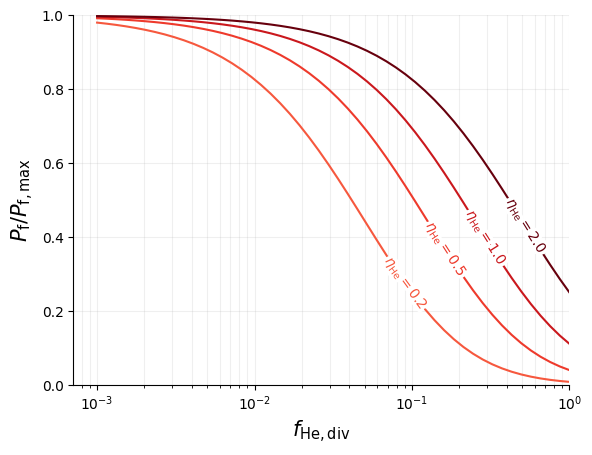

In [32]:

compute_pf_ratio = sp.lambdify(((eta_he, f_he_div),), sp.solve(new_power_ratio, P_f/P_f_max)[0])

f_he_div_values = np.logspace(-3, 0)

norm = colors.Normalize(vmin=-2, vmax=2)

for eta_he_val in [0.2, 0.5, 1, 2]:
    pf = compute_pf_ratio((eta_he_val, f_he_div_values))
    plt.plot(
        f_he_div_values,
        pf,
        label="$\eta_\mathrm{He} = $" + f"{eta_he_val:.1f}",
        color=cm.Reds(norm(eta_he_val)),
    )

plt.xscale("log")
plt.xlabel("$f_\mathrm{He,div}$", fontsize=15)
plt.ylabel("$P_\mathrm{f}/P_\mathrm{f, max}$", fontsize=15)
plt.grid(alpha=0.2, which='both')
plt.ylim(0, 1)
plt.xlim(right=1)

labelLines(plt.gca().get_lines(), zorder=2.5)
plt.gca().spines.right.set_visible(False)
plt.gca().spines.top.set_visible(False)
plt.savefig("Pf_fhe_UPDATE.pdf")


$P_\mathrm{f} / P_\mathrm{f, max}$ can be expressed as a function of $\mathrm{TBE}$, $\eta_\mathrm{He}$ and $\Sigma$

In [33]:
# formula for figure 3

power_ratio_vs_sigma_eta_he = new_power_ratio.subs(
    f_he_div, sp.solve(eq12, f_he_div)[0]
)
power_ratio_vs_sigma_eta_he.simplify()


Eq(P_\mathrm{f}/P_\mathrm{f, max}, \Sigma**2*\eta_\mathrm{He}**2*(\mathrm{TBE} - 1)**2/(\Sigma*\eta_\mathrm{He}*(\mathrm{TBE} - 1) - \mathrm{TBE})**2)

In [38]:
sp.print_latex((1 - 1/(sigma * eta_he*(1-1/tbe)))**sp.Rational(-2))

\frac{1}{\left(1 - \frac{1}{\Sigma \eta_\mathrm{He} \left(1 - \frac{1}{\mathrm{TBE}}\right)}\right)^{2}}


**NOTE** this can be further simplified

In [ ]:
power_ratio = sp.lambdify(((sigma, eta_he, tbe),), power_ratio_vs_sigma_eta_he.rhs)

Text(0, 0.5, 'TBE')

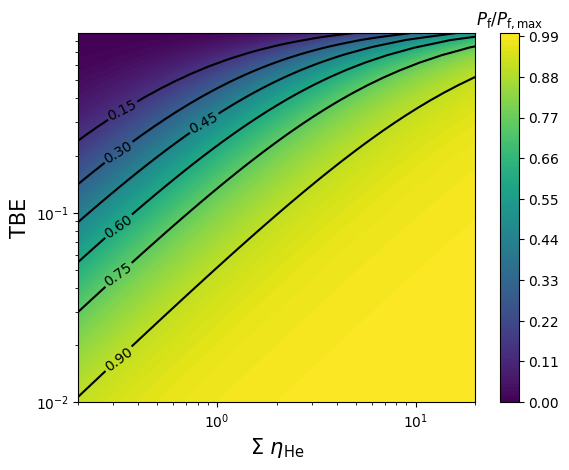

In [ ]:
tbe_values = np.logspace(-2, -0.05)
sigmaeta_values = np.geomspace(0.2, 20, num=100)
TBETBE, sigetsiget = np.meshgrid(tbe_values, sigmaeta_values)
plt.figure()

cs = plt.contourf(sigetsiget, TBETBE, power_ratio((sigetsiget, 1, TBETBE)), levels=100)
cs2 = plt.contour(
    sigetsiget, TBETBE, 
    power_ratio((sigetsiget, 1, TBETBE)),
    levels=6,
    colors="black",
)
plt.xscale("log")
plt.yscale("log")
plt.clabel(cs2, cs2.levels, colors="black")

cb = plt.colorbar(cs)
cb.ax.set_title("$P_\mathrm{f}/P_\mathrm{f, max}$")
plt.xlabel("$\Sigma \ \eta_\mathrm{He}$", fontsize=15)
plt.ylabel("TBE", fontsize=15)

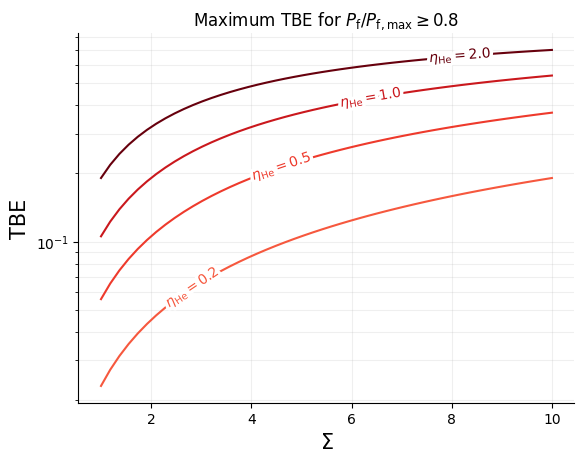

In [ ]:
tbe_values = np.logspace(-2, -0.05)
sigma_values = np.linspace(1, 10)
eta_he_values = [0.2, 0.5, 1.0, 2.0]
plt.figure()

for eta_he_val in eta_he_values:
    # replace power ratio by 0.8
    power_ratio_80percent = power_ratio_vs_sigma_eta_he.subs(P_f / P_f_max, 0.8)

    # solve for TBE
    requiredTBE = sp.solve(power_ratio_80percent, tbe)[0]

    # convert to function
    requiredTBE = sp.lambdify(((sigma, eta_he),), requiredTBE)

    # plot
    plt.plot(
        sigma_values,
        requiredTBE(
            (
                sigma_values,
                eta_he_val,
            )
        ),
        color=cm.Reds(norm(eta_he_val)),
        label="$\eta_\mathrm{He} = $" + f"{eta_he_val:.1f}"
    )

plt.yscale("log")

plt.xlabel("$\Sigma$", fontsize=15)
plt.ylabel("TBE", fontsize=15)
plt.title("Maximum TBE for $P_\mathrm{f}/P_\mathrm{f, max} \geq 0.8$")
labelLines(plt.gca().get_lines(), zorder=2.5)
plt.gca().spines.right.set_visible(False)
plt.gca().spines.top.set_visible(False)
plt.grid(alpha=0.2, which="both")
plt.savefig("power_reduction_80percent_vs_sigma.pdf")


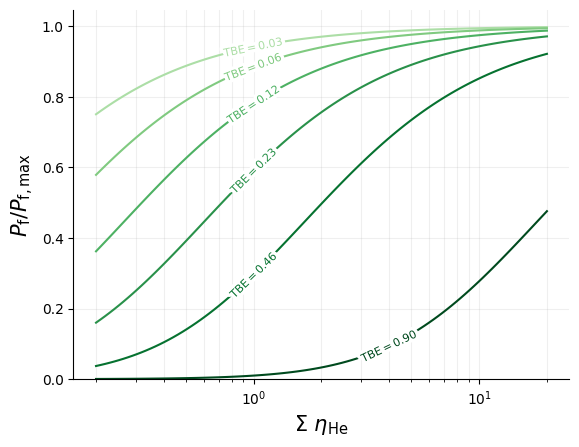

In [ ]:
norm = colors.LogNorm(vmin=5e-3, vmax=1)

tbe_values = np.geomspace(3e-2, 0.9, num=6)
sigmaeta_values = np.geomspace(0.2, 20, num=100)
plt.figure()

for TBE_val in tbe_values:
    plt.plot(
        sigmaeta_values,
        power_ratio((sigmaeta_values, 1, TBE_val)),
        color=cm.Greens(norm(TBE_val)),
        label="$\mathrm{TBE} = $" + f"{TBE_val:.2f}"
    )
plt.xscale("log")
plt.ylim(bottom=0)
plt.grid(alpha=0.2, which="both")
plt.xlabel("$\Sigma \ \eta_\mathrm{He}$", fontsize=15)
plt.ylabel("$P_\mathrm{f}/P_\mathrm{f, max}$", fontsize=15)
labelLines(plt.gca().get_lines(), zorder=2.5, fontsize=8, xvals=[1]*5 + [4])
plt.gca().spines.right.set_visible(False)
plt.gca().spines.top.set_visible(False)

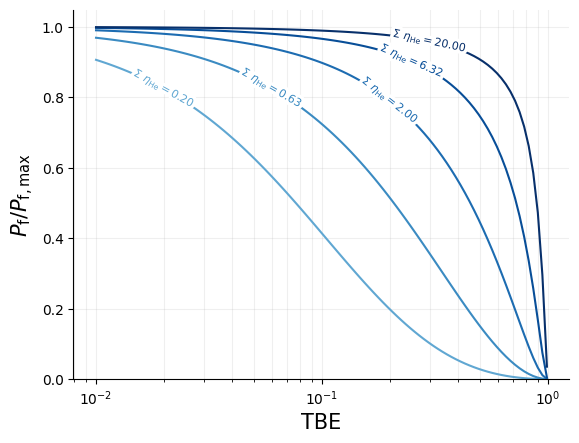

In [ ]:
norm = colors.LogNorm(vmin=1e-3, vmax=20)

tbe_values = np.logspace(-2, -0.005, num=100)
plt.figure()

for sigmaeta in np.geomspace(0.2, 20, num=5):
    plt.plot(
        tbe_values,
        power_ratio((sigmaeta, 1, tbe_values)),
        color=cm.Blues(norm(sigmaeta)),
        label="$\Sigma \ \eta_\mathrm{He} = $" + f"{sigmaeta:.2f}"
    )
plt.xscale("log")
plt.ylim(bottom=0)
plt.grid(alpha=0.2, which="both")
plt.xlabel("TBE", fontsize=15)
plt.ylabel("$P_\mathrm{f}/P_\mathrm{f, max}$", fontsize=15)
labelLines(plt.gca().get_lines(), zorder=2.5, fontsize=8, xvals=[2e-2, 6e-2, 2e-1, 0.25, 0.3])
plt.gca().spines.right.set_visible(False)
plt.gca().spines.top.set_visible(False)
plt.savefig("power_reduction_vs_TBE.pdf")

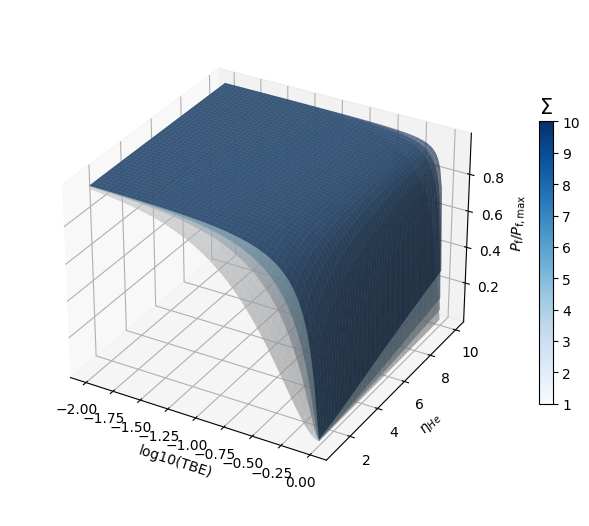

In [ ]:
eta_he_values = np.linspace(1, 10)
XX, YY = np.meshgrid(tbe_values, eta_he_values)

from mpl_toolkits import mplot3d
%matplotlib inline
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')


# choose one of these norms
# norm = colors.LogNorm()
# sigma_values = [0.001, 0.01, 0.1, 1]

norm = colors.Normalize()
sigma_values = [1, 3, 5, 10]

norm(sigma_values)


for sigma_val in sigma_values:
    cf = ax.plot_surface(np.log10(XX), YY, power_ratio((sigma_val, YY, XX)), color=cm.Blues(norm(sigma_val)), alpha=0.6)
plt.xlabel("log10(TBE)")
plt.ylabel("$\eta_{He}$")
ax.set_zlabel("$P_\mathrm{f}/P_\mathrm{f, max}$")

plt.gca().set_box_aspect(aspect=(4,4,3), zoom=0.9)
cb = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cm.Blues), fraction=0.026, pad=0.04, ax=plt.gca())
cb.ax.set_title("$\Sigma$", fontsize=15)
plt.tight_layout()
plt.show()

## Achieving high TBE and fusion energy gain

Power balance in the core requires:

In [ ]:
tau_e = sp.Symbol(r"\tau_E")
P_alpha = sp.Symbol(r"P_\alpha")
P_ext = sp.Symbol(r"P_\mathrm{ext}")
W_th = sp.Symbol(r"W_\mathrm{th}")

power_balance = sp.Eq(P_alpha + P_ext, W_th/tau_e)
power_balance

Eq(P_\alpha + P_\mathrm{ext}, W_\mathrm{th}/\tau_E)

$Q_p$ is the ratio of fusion power density and external power

In [ ]:
q_p = sp.Symbol("Q_p")

q_def = sp.Eq(q_p, P_f/P_ext)
q_def

Eq(Q_p, P_\mathrm{f}/P_\mathrm{ext})

The alpha heating can be expressed as:

In [ ]:
p_alpha_def = sp.Eq(P_alpha, P_f/sp.Rational(5))
p_alpha_def

Eq(P_\alpha, P_\mathrm{f}/5)

In [ ]:
e_alpha = sp.Symbol(r"E_\alpha")

E_alpha_def = sp.Eq(e_alpha, E_dt/sp.Rational(5))
E_alpha_def

Eq(E_\alpha, E_\mathrm{DT}/5)

The stored thermal energy is expressed as:

In [ ]:
T = sp.Symbol("T")

w_th_def = sp.Eq(W_th, sp.Rational(3/2)*(n_e + n_q_core + n_alpha)*k_b*T).simplify()
w_th_def

Eq(W_\mathrm{th}, 3*T*k_B*(n_\mathrm{Q, core} + n_{\alpha} + n_{e})/2)

By applying charge neutrality

In [ ]:
w_th_def = w_th_def.subs(n_q_core, sp.solve(charge_neutrality, n_q_core)[0]).simplify()
w_th_def

Eq(W_\mathrm{th}, 3*T*k_B*(-n_{\alpha} + 2*n_{e})/2)

In [ ]:
w_th_def = w_th_def.subs(
    n_alpha, sp.solve(ash_dilution_fraction, n_alpha)[0]
).simplify()
w_th_def


Eq(W_\mathrm{th}, 3*T*k_B*n_{e}*(2 - f_\mathrm{dil})/2)

We can therefore express the power balance as:

In [ ]:
power_balance = power_balance.subs(P_ext, sp.solve(q_def, P_ext)[0]).subs(
    P_alpha, sp.solve(p_alpha_def, P_alpha)[0]
).subs(W_th, sp.solve(w_th_def, W_th)[0]).simplify()
power_balance


Eq(P_\mathrm{f}/5 + P_\mathrm{f}/Q_p, 3*T*k_B*n_{e}*(2 - f_\mathrm{dil})/(2*\tau_E))

In [ ]:
power_expr

Eq(P_\mathrm{f}, E_\mathrm{DT}*R(T)_\mathrm{DT}*k_B*n_{e}**2*(2*f_\mathrm{dil} - 1)**2/4)

In [ ]:
power_balance

Eq(P_\mathrm{f}/5 + P_\mathrm{f}/Q_p, 3*T*k_B*n_{e}*(2 - f_\mathrm{dil})/(2*\tau_E))

In [ ]:
sp.solve(power_balance, P_f)[0]

15*Q_p*T*k_B*n_{e}*(2 - f_\mathrm{dil})/(2*\tau_E*(Q_p + 5))

In [ ]:
power_balance = power_balance.subs(P_f, sp.solve(power_expr, P_f)[0]).simplify()

lhs = tau_e
power_balance = sp.Eq(lhs, sp.solve(power_balance, lhs)[0]).simplify()
factor = n_e
power_balance = sp.Eq(power_balance.lhs * factor, power_balance.rhs * factor).simplify()

factor = (1 + 5/q_p)
power_balance = sp.Eq(power_balance.lhs * factor, power_balance.rhs * factor).simplify()

power_balance

Eq(\tau_E*n_{e}*(Q_p + 5)/Q_p, -30*T*(f_\mathrm{dil} - 2)/(E_\mathrm{DT}*R(T)_\mathrm{DT}*(2*f_\mathrm{dil} - 1)**2))

Replacing by E_alpha:

In [ ]:
power_balance = power_balance.subs(E_dt, sp.solve(E_alpha_def, E_dt)[0])
power_balance

Eq(\tau_E*n_{e}*(Q_p + 5)/Q_p, -6*T*(f_\mathrm{dil} - 2)/(E_\alpha*R(T)_\mathrm{DT}*(2*f_\mathrm{dil} - 1)**2))

In [ ]:

dilution_term = (sp.Rational(1) - sp.Rational(0.5) * f_dil) / (
    sp.Rational(1) - sp.Rational(2) * f_dil
) ** 2

eq26 = sp.Eq(
    n_e * tau_e * (sp.Rational(1) + sp.Rational(5) / q_p),
    (sp.Rational(12) * T / (e_alpha * R_T)) * dilution_term,
)
eq26


Eq(\tau_E*n_{e}*(1 + 5/Q_p), 12*T*(1 - f_\mathrm{dil}/2)/(E_\alpha*R(T)_\mathrm{DT}*(1 - 2*f_\mathrm{dil})**2))

Let's express the $n_e \ \tau_E$ multiplier as a function of $\Sigma$, $\mathrm{TBE}$, and $\eta_\mathrm{He}$:

In [ ]:
multiplier = dilution_term

multiplier = (
    multiplier.subs(f_dil, f_dil_vs_f_he_div_eta_he.rhs)
    .subs(f_he_div, sp.solve(eq12, f_he_div)[0])
    .simplify()
)

multiplier


(\Sigma*\eta_\mathrm{He}*(\mathrm{TBE} - 1) - \mathrm{TBE})*(4*\Sigma*\eta_\mathrm{He}*(\mathrm{TBE} - 1) - 3*\mathrm{TBE})/(4*\Sigma**2*\eta_\mathrm{He}**2*(\mathrm{TBE} - 1)**2)

C:\Users\remidm\AppData\Roaming\Python\Python311\site-packages\labellines\core.py:204: UserWarning: The value at position 0 in `xvals` is outside the range of its associated line (xmin=0.001, xmax=0.07241648303052405, xval=0.5314379241592807). Clipping it into the allowed range.
  warnings.warn(


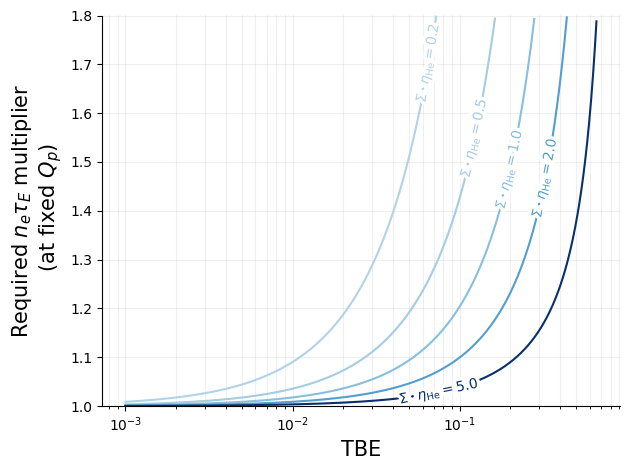

In [ ]:
multiplier_f = sp.lambdify(((sigma, eta_he, tbe),), multiplier)

tbe_values = np.geomspace(1e-3, 8e-1, 1000)
product_values = [0.2, 0.5, 1.0, 2.0, 5.0]
norm = colors.Normalize(vmin=-2, vmax=5.0)
for product in product_values:
    multiplier_values = multiplier_f((1, product, tbe_values))
    multiplier_values_cut = multiplier_values[np.where(multiplier_values < 1.8)]
    tbe_values_cut = tbe_values[np.where(multiplier_values < 1.8)]
    plt.plot(
        tbe_values_cut,
        multiplier_values_cut,
        color=cm.Blues(norm(product)),
        label="$\Sigma \cdot \eta_\mathrm{He} = $" + f"{product}",
    )
plt.xscale("log")
labelLines(plt.gca().get_lines(), zorder=2.5)
plt.gca().spines.right.set_visible(False)
plt.gca().spines.top.set_visible(False)
plt.ylim(1, 1.8)

plt.xlabel("TBE", fontsize=15)
plt.ylabel(r"Required $n_e \tau_E$ multiplier" + "\n (at fixed $Q_p$)", fontsize=15)
plt.grid(alpha=0.2, which='both')
plt.tight_layout()
plt.savefig("ntau_TBE_UPDATE.pdf")


## Derive expression of $Q_p$ at fixed $Q_{p,0}$

First replace $f_\mathrm{dil}$ by zero to obtain $Q_{p,0}$:

In [ ]:
q_p_0 = sp.Symbol("Q_{p, 0}")

eq26_zero_dil = eq26.subs(f_dil, 0).subs(q_p, q_p_0)
eq26_zero_dil


Eq(\tau_E*n_{e}*(1 + 5/Q_{p, 0}), 12*T/(E_\alpha*R(T)_\mathrm{DT}))

Inject this equation in Eq 26

In [ ]:
eq_Q_p = sp.Eq(q_p, sp.solve(eq26.subs(tau_e, sp.solve(eq26_zero_dil, tau_e)[0]).simplify(), q_p)[0].simplify())
eq_Q_p


Eq(Q_p, 10*Q_{p, 0}*(-4*f_\mathrm{dil}**2 + 4*f_\mathrm{dil} - 1)/(8*Q_{p, 0}*f_\mathrm{dil}**2 - 7*Q_{p, 0}*f_\mathrm{dil} + 5*f_\mathrm{dil} - 10))

Express as a function of TBE and $\Sigma \cdot \eta_\mathrm{He}$

In [ ]:
eq_Q_p = eq_Q_p.subs(f_dil, sp.solve(f_alpha_core_expr, f_dil)[0]).subs(
    f_alpha_core, sp.solve(enrichment, f_alpha_core)[0]
).subs(
    f_he_div, sp.solve(eq12, f_he_div)[0]
).simplify()
eq_Q_p

Eq(Q_p, -20*Q_{p, 0}*(\mathrm{TBE}**2 + 2*\mathrm{TBE}*(\Sigma*\eta_\mathrm{He}*(\mathrm{TBE} - 1) - \mathrm{TBE}) + (\Sigma*\eta_\mathrm{He}*(\mathrm{TBE} - 1) - \mathrm{TBE})**2)/(4*Q_{p, 0}*\mathrm{TBE}**2 + \mathrm{TBE}*(7*Q_{p, 0} - 5)*(\Sigma*\eta_\mathrm{He}*(\mathrm{TBE} - 1) - \mathrm{TBE}) - 20*(\Sigma*\eta_\mathrm{He}*(\mathrm{TBE} - 1) - \mathrm{TBE})**2))

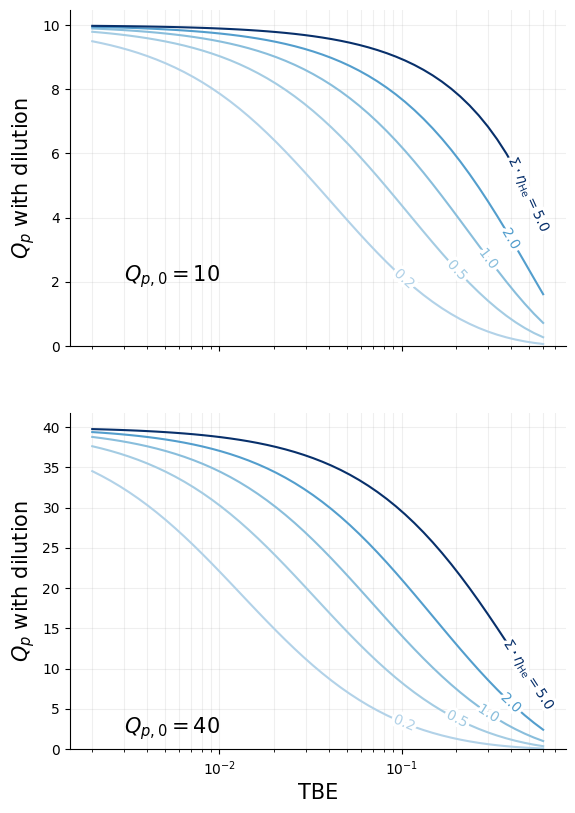

In [ ]:
compute_q_p = sp.lambdify(((sigma, eta_he, tbe, q_p_0),), sp.solve(eq_Q_p, q_p)[0])

tbe_values = np.geomspace(2e-3, 6e-1)
norm = colors.Normalize(vmin=-2, vmax=5.0)

fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(6.4, 4.8 * 2))
for row_id, q_p_0_value in enumerate([10, 40]):
    plt.sca(axs[row_id])
    for i, product in enumerate(product_values):
        if i == len(product_values)-1:
            label = "$\Sigma \cdot \eta_\mathrm{He} = $" + f"{product}"
        else:
            label = f"{product}"
        plt.plot(
            tbe_values,
            compute_q_p((1, product, tbe_values, q_p_0_value)),
            color=cm.Blues(norm(product)),
            label=label
        )

    plt.ylabel("$Q_p$ with dilution", fontsize=15)
    plt.annotate("$Q_{p,0}=$" + f"{q_p_0_value}", (3e-3, 2), fontsize=15)
    plt.ylim(bottom=0)
    plt.gca().spines.right.set_visible(False)
    plt.gca().spines.top.set_visible(False)
    labelLines(plt.gca().get_lines(), zorder=2.5)
    plt.grid(alpha=0.2, which='both')
plt.xscale("log")
plt.xlabel("TBE", fontsize=15)

plt.savefig("Qp_TBE_UPDATE.pdf")
